Task 2 : Exploratory Data Analysis - Titanic Dataset

Problem Statement :

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Sample Dataset :- https://www.kaggle.com/c/titanic/data

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading The Dataset

In [84]:
titanic = pd.read_excel(r"E:\data science internship task 2\1111\Titanic.xlsx")

In [85]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Cleaning


In [86]:
# Check for missing values
print(titanic.isnull().sum())

# Fill missing values for 'Age' with the median age
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Fill missing values for 'Embarked' with the mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Print columns to check which ones are available
print("Columns before dropping:", titanic.columns)

# Drop unnecessary columns if they exist
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
columns_existing = [col for col in columns_to_drop if col in titanic.columns]

if columns_existing:
    titanic.drop(columns=columns_existing, inplace=True)

# Print columns after dropping to confirm
print("Columns after dropping:", titanic.columns)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Columns before dropping: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns after dropping: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


Exploratory Data Analysis (EDA)

Exploring the relationships between variables and identify patterns and trends in the data

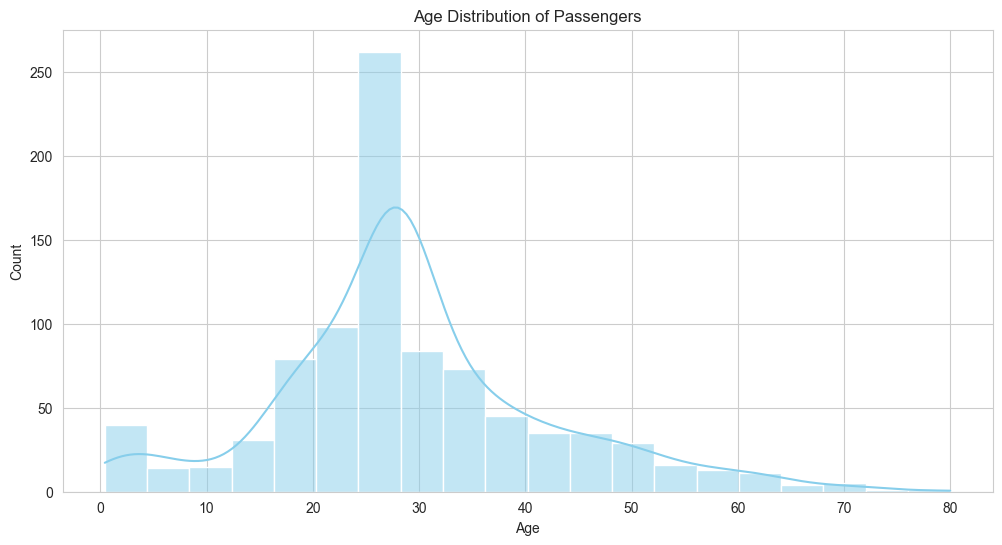

In [87]:
plt.figure(figsize=(12, 6))
sns.histplot(titanic['Age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()

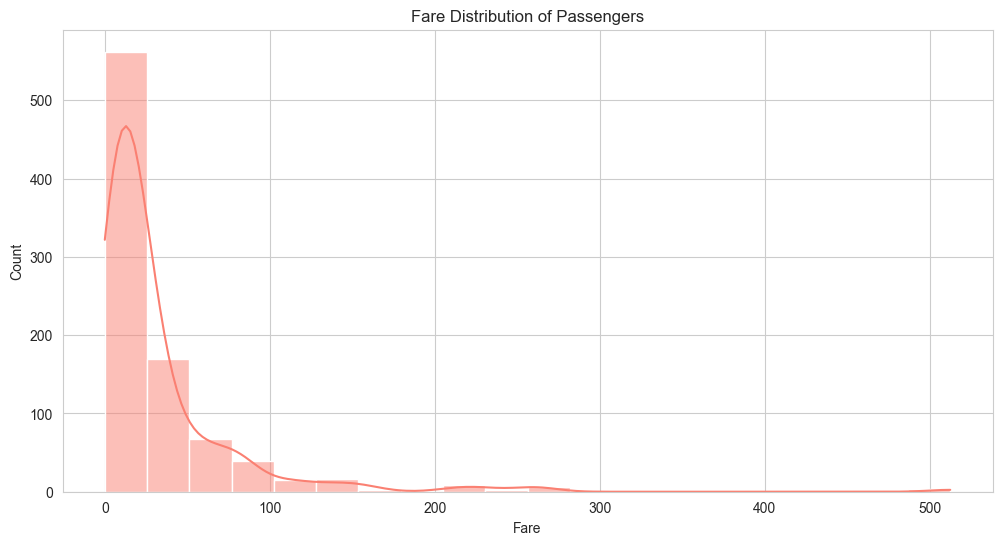

In [88]:
plt.figure(figsize=(12, 6))
sns.histplot(titanic['Fare'], bins=20, kde=True, color='salmon')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution of Passengers')
plt.show()

Survival Rate By Sex

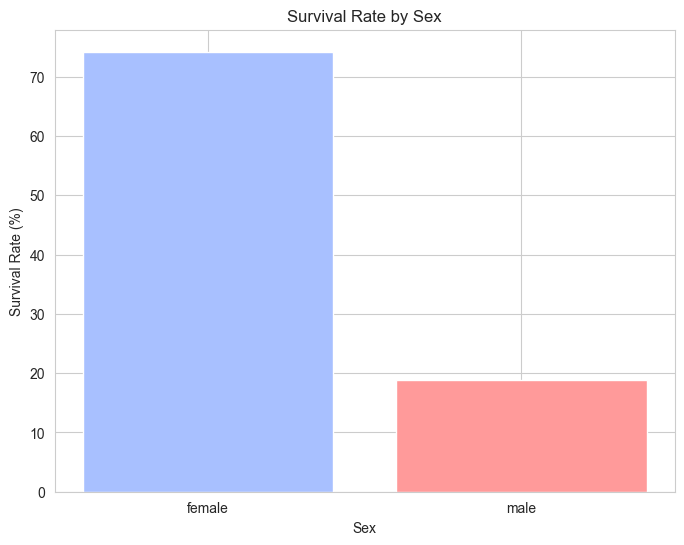

In [89]:
plt.figure(figsize=(8, 6))
plt.bar(sex_survived.index, sex_survived.values, color=['#a8c0ff', '#ff9a9a'])  # Use your own color list if needed
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

Survival Rate By Pclass

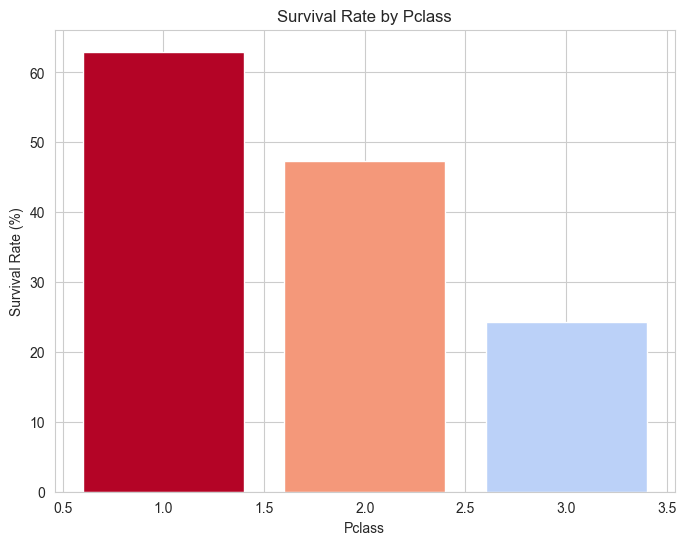

In [90]:
import matplotlib.pyplot as plt

pclass_survived = titanic.groupby('Pclass')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
bars = plt.bar(pclass_survived.index, pclass_survived.values, color=plt.cm.coolwarm(pclass_survived.values / max(pclass_survived.values)))
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()



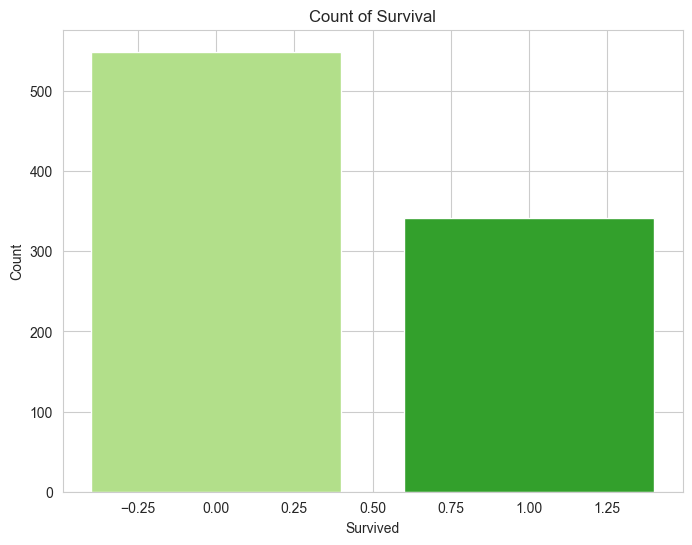

In [91]:
counts = titanic['Survived'].value_counts()
colors = ['#b2df8a', '#33a02c']  # Green colors for the categories
plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Survival')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

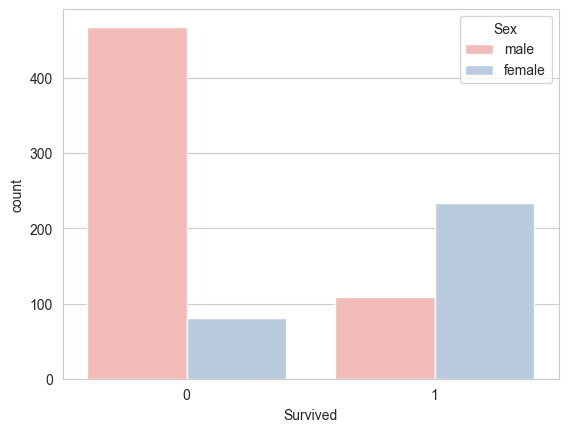

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='Pastel1')

<Axes: xlabel='Survived', ylabel='count'>

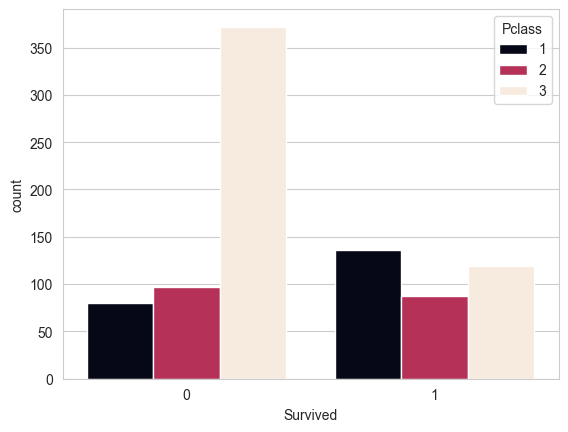

In [93]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rocket')

Plotting HistPlot

<Figure size 1200x1000 with 0 Axes>

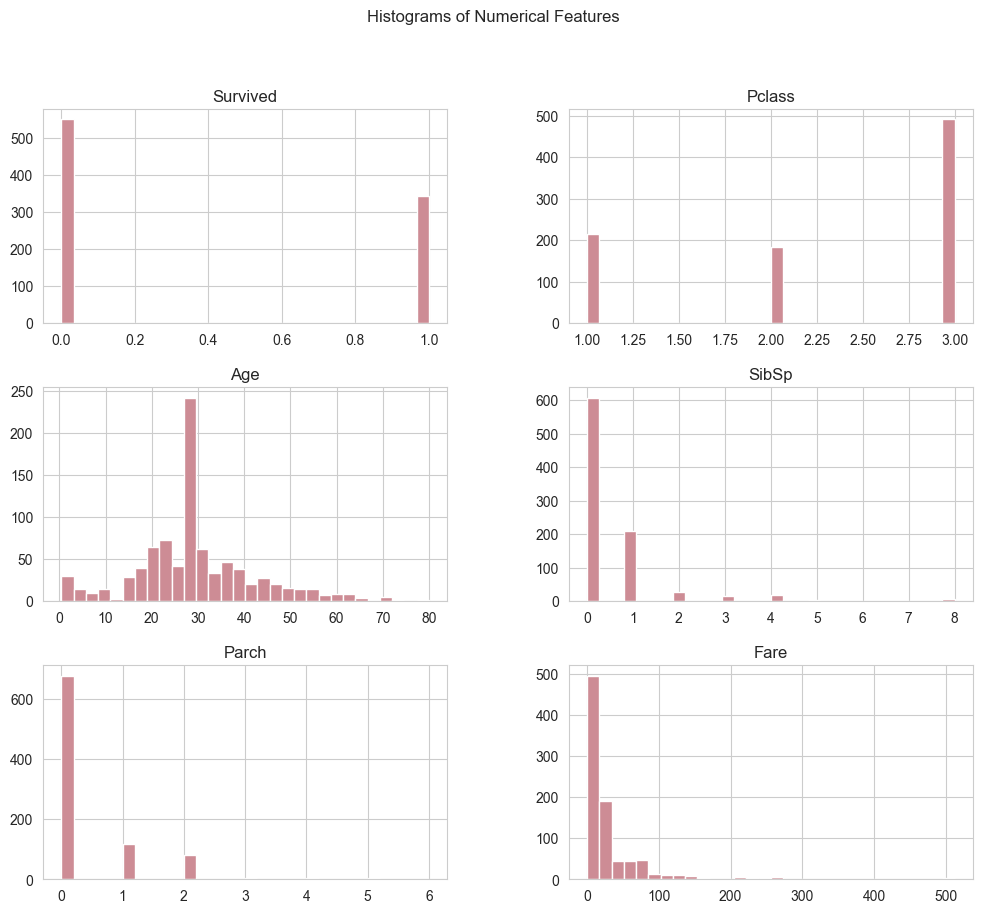

In [94]:
plt.figure(figsize=(12, 10))
titanic.hist(figsize=(12, 10), color='#CD8C95', bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()


Plotting PairPlot

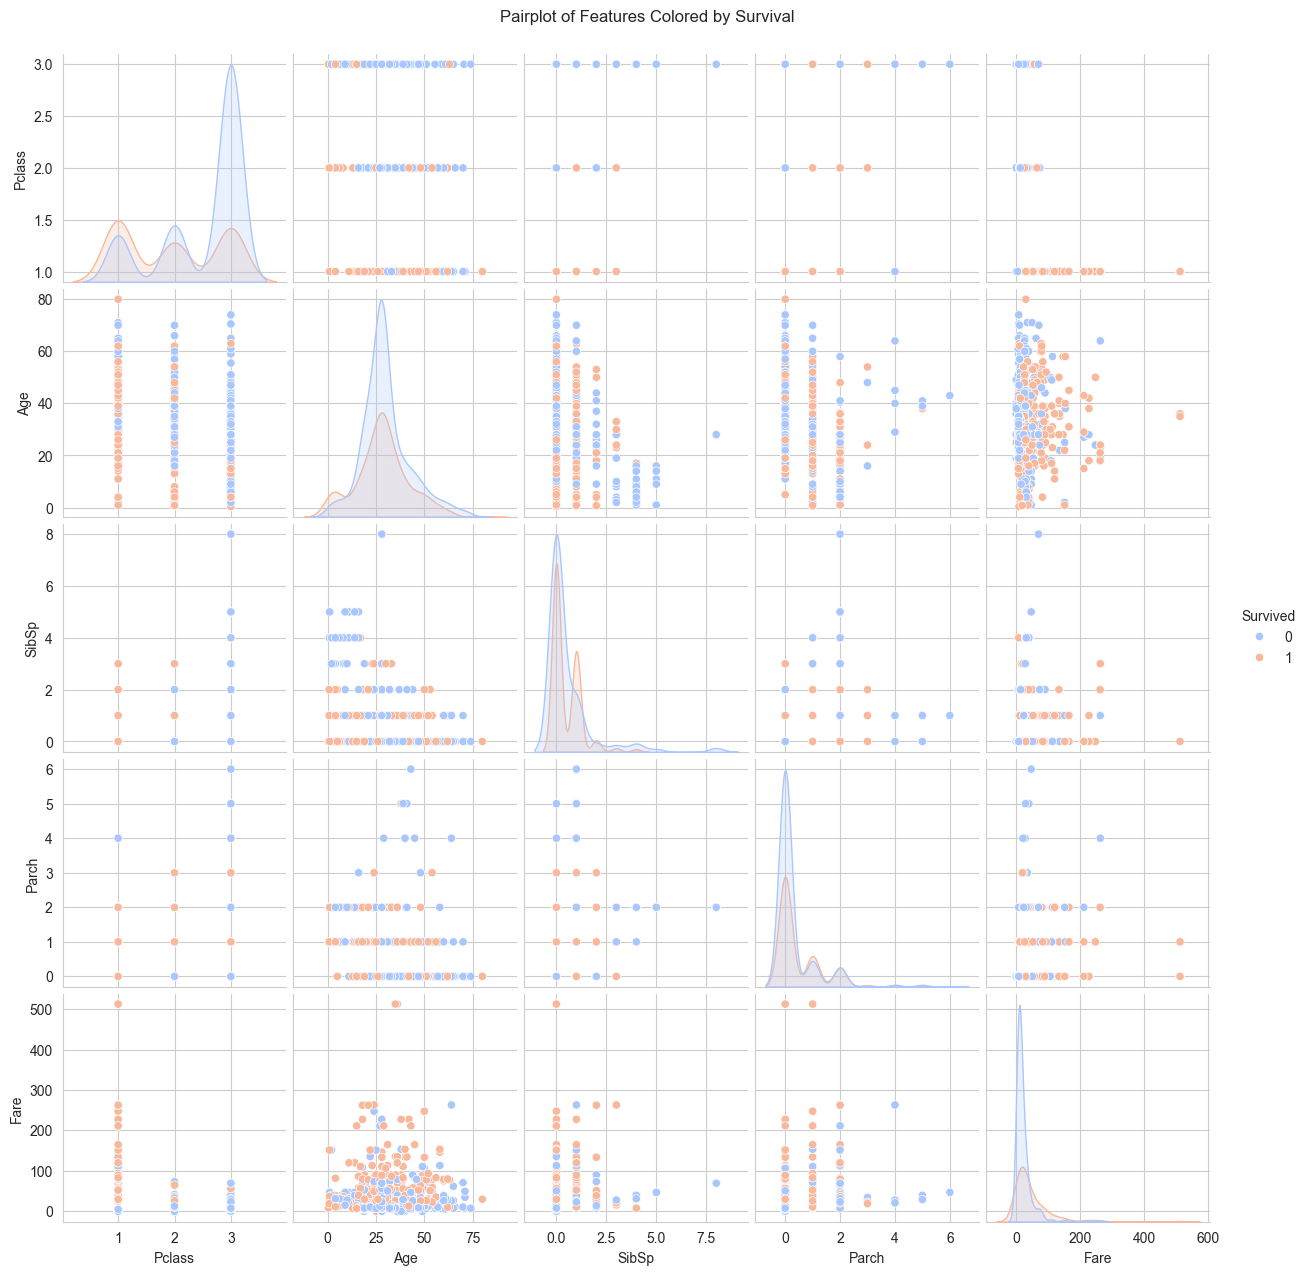

In [95]:
sns.pairplot(titanic, hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot of Features Colored by Survival', y=1.02)
plt.show()

Plotting Correlation Plot

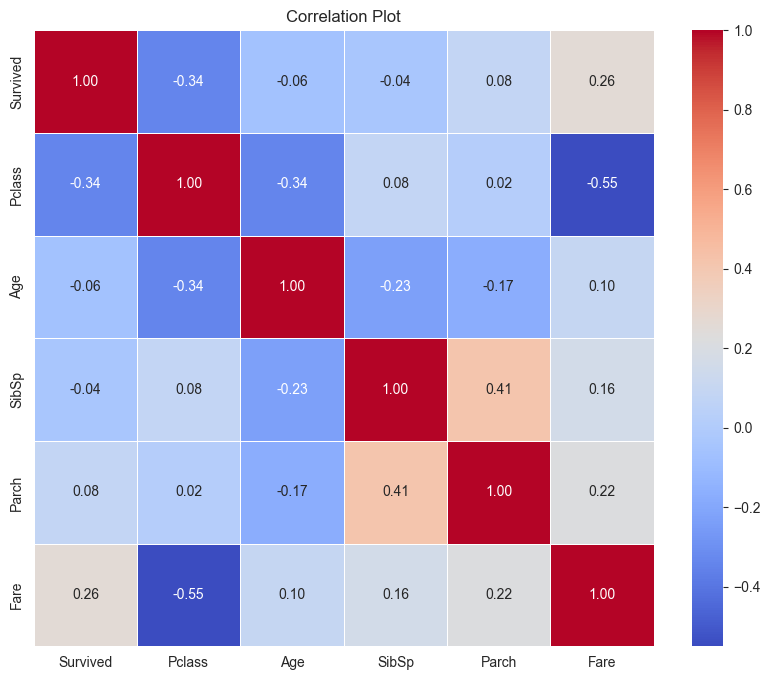

In [96]:
numeric_data = titanic.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

Conclusion

The Exploratory Data Analysis (EDA) of the Titanic dataset has provided valuable insights into the characteristics and survival rates of passengers aboard the ill-fated ship.

1. Age Distribution: The age distribution plot revealed that most passengers were between 20 and 40 years old, with a notable number of younger and older passengers. The kernel density estimate (KDE) overlay offers a smoother representation of age distribution trends.

2. Fare Distribution: The fare distribution shows a wide range of ticket prices, with a concentration of passengers paying lower fares. The KDE plot highlights that a few passengers paid significantly higher fares.

3. Survival Rate by Sex: Analysis of survival rates by sex demonstrated a stark contrast between genders. Female passengers had a substantially higher survival rate (approximately 74%) compared to male passengers (around 19%). This trend was confirmed with a bar plot showcasing survival percentages by gender.

4. Survival Rate by Pclass: The survival rates by passenger class (Pclass) indicate that higher-class passengers had a better chance of survival. Passengers in Pclass 1 had a survival rate of about 63%, compared to 47% in Pclass 2 and 24% in Pclass 3. This is visually represented through a bar plot, emphasizing the impact of social class on survival chances.

5. Count Plots: The count plots further explore the distribution of survivors and non-survivors, segmented by sex and Pclass. These plots reveal that survival rates were higher among females and first-class passengers.

6. Histograms of Numerical Features: The histograms of numerical features provide an overview of the distribution of age, fare, and other numerical variables. They highlight the range and frequency of these variables among passengers.

7. Pairplot: The pairplot, colored by survival status, illustrates the relationships between numerical features and their distribution across survival categories. This visual representation helps in understanding how different features relate to survival.

8. Correlation Plot: The correlation heatmap reveals the relationships between numerical features. It shows that 'Fare' has a moderate positive correlation with 'Pclass', while 'Age' has a weak correlation with other variables.

9. Overall, the analysis highlights key factors affecting survival, such as gender and social class, and provides a comprehensive view of passenger demographics and ticket pricing. These insights enhance our understanding of the Titanic disaster and the various factors influencing survival outcomes.